In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.core.pylabtools import figsize
%matplotlib inline
figsize(2 ,4)
plt.style.use('ggplot')
colors = ['#348ABD','#A60628','#7A68A6','#467821','#D55E00','#CC79A7','#56B4E9','#009E73','#F0E442','#0072B2']
plt.cmap = mpl.colors.ListedColormap(colors)
# plt.rcParams['savefig.dpi'] = 300
# plt.rcParams['figure.dpi'] = 300


In [2]:
import numpy as np
from sklearn import datasets  
digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30

In [3]:
X.shape

(1797, 64)

In [4]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [5]:
y.shape

(1797,)

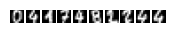

In [6]:
fig = plt.figure()
for i in range(10):
    ax = plt.subplot2grid((1, 10), (0, i))
    ax.imshow(digits.data[i * 100].reshape(8, 8), cmap=plt.cm.gray)
    ax.axis('off')

In [7]:
def plot_embedding(ax , X):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    for i in range(X.shape[0]):
        ax.text(X[i, 0], X[i, 1], str(digits.target[i]),
                color=colors[int(y[i] % 10)],
                fontdict={ 'size': 12})

def format_plot(ax,x_label,y_label, title):
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())

    ax.set_title(title)        

## PCA降维

In [8]:
from sklearn import decomposition
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)

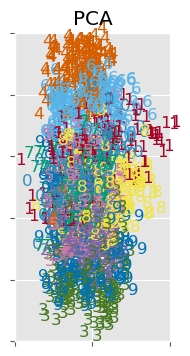

In [9]:
fig, ax = plt.subplots()
plot_embedding(ax,X_pca)
format_plot(ax,'','', 'PCA')


## Spectral降维

In [12]:
from sklearn import manifold
embedder = manifold.SpectralEmbedding(n_components=2, random_state=0,
                                      eigen_solver="arpack")
X_se = embedder.fit_transform(X)

## MDS 降维

In [13]:

mds =  manifold.MDS(n_components=2, n_init=1, max_iter=100)
X_mds = mds.fit_transform(X)

/home/xeniro/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


## tSNE降维

In [14]:
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)

X_tsne = tsne.fit_transform(X)

## 比较四种降维方法

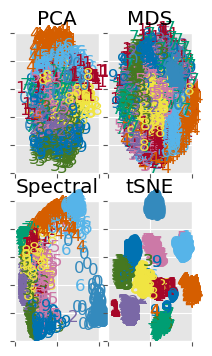

In [15]:
fig, ax = plt.subplots(2, 2)
figsize(20,16)
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

plot_embedding(ax[0,0],X_pca)
format_plot(ax[0,0],'','', 'PCA') 

plot_embedding(ax[0,1],X_mds)
format_plot(ax[0,1],'','', 'MDS')

plot_embedding(ax[1,0],X_se)
format_plot(ax[1,0],'','', 'Spectral')

plot_embedding(ax[1,1],X_tsne)
format_plot(ax[1,1],'','', 'tSNE')